In [2]:
import os
import numpy as np 
import pandas as pd # import libraries
import tensorflow.keras as keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.mobilenet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, Sequential

import matplotlib.image as mpimg
import tensorflow as tf

In [3]:
train_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/train/'
val_path = '/kaggle/input/horses-or-humans-dataset/horse-or-human/validation/' #create file path

In [4]:
horses_dir_train = os.path.join(train_path, 'horses')
humans_dir_train = os.path.join(train_path, 'humans')
horses_dir_val = os.path.join(val_path, 'horses')
humans_dir_val = os.path.join(val_path, 'humans') #directory for files

In [5]:
print('Horses Train: ', len(os.listdir(horses_dir_train)))
print('Humans Train: ', len(os.listdir(humans_dir_train)))
print('Horses Val: ', len(os.listdir(horses_dir_val)))
print('Humans Val: ', len(os.listdir(humans_dir_val))) #print length of files

Horses Train:  500
Humans Train:  527
Horses Val:  128
Humans Val:  128


In [6]:
horses_files_train = os.listdir(horses_dir_train)
humans_files_train = os.listdir(humans_dir_train)
horses_files_val = os.listdir(horses_dir_val)
humans_files_val = os.listdir(humans_dir_val) #create path

In [7]:
print(horses_files_train[:5])
print(humans_files_train[:5])
print(horses_files_val[:5])
print(humans_files_val[:5]) #print files

['horse46-4.png', 'horse40-1.png', 'horse06-2.png', 'horse07-7.png', 'horse48-3.png']
['human06-23.png', 'human16-08.png', 'human14-28.png', 'human16-13.png', 'human12-30.png']
['horse3-469.png', 'horse1-276.png', 'horse5-400.png', 'horse2-314.png', 'horse6-544.png']
['valhuman03-22.png', 'valhuman02-05.png', 'valhuman01-24.png', 'valhuman05-26.png', 'valhuman04-00.png']


In [8]:
pic_index = 2

next_horses_train = [os.path.join(horses_dir_train, fname)
                  for fname in horses_files_train[pic_index-2:pic_index]]
next_humans_train = [os.path.join(humans_dir_train, fname)
             for fname in humans_files_train[pic_index-2:pic_index]] #print images

(300, 300, 4)


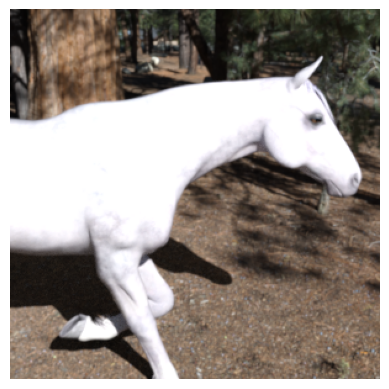

(300, 300, 4)


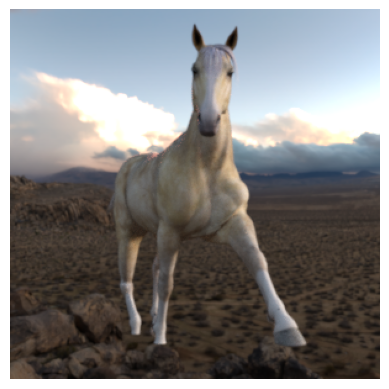

(300, 300, 4)


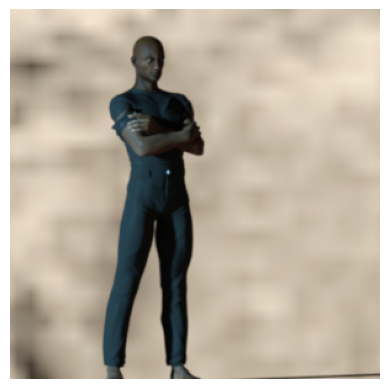

(300, 300, 4)


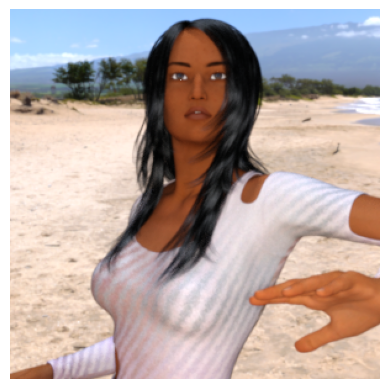

In [9]:
for i, img_path in enumerate(next_horses_train+next_humans_train):
    # print(img_path)
    img = mpimg.imread(img_path)
    print(img.shape)
    plt.imshow(img)
    plt.axis('Off')
    plt.show()

In [10]:
!pip install keras_preprocessing

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 2.2 MB/s eta 0:00:00


In [11]:
training_datagen = ImageDataGenerator(
      rescale = 1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest') #augmenting images

In [12]:
validation_datagen = ImageDataGenerator(rescale = 1./255) #validation generate 

In [13]:
train_generator = training_datagen.flow_from_directory(
                  train_path,
                  target_size=(150,150),
                  class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
                       val_path,
                       target_size=(150,150),
                       class_mode='categorical'
) #get images from directory

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [14]:
model = tf.keras.models.Sequential([
    # first convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # second convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    #  third convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # fourth convolution
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),
    
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 148, 148, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 74, 74, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 72, 72, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 15, 15, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       401,472 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 661,762 (2.52 MB)

 Trainable params: 661,762 (2.52 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
model.compile(loss = 'categorical_crossentropy',
              optimizer='rmsprop', 
              metrics=['accuracy']
             )
#compile model

In [16]:
history = model.fit(train_generator, 
                    epochs=5, 
                    validation_data = validation_generator, 
                    verbose = 1)#fit model

Epoch 1/5


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 1/33 ━━━━━━━━━━━━━━━━━━━━ 6:28 12s/step - accuracy: 0.5312 - loss: 0.6754

I0000 00:00:1712582470.502411     105 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


 6/33 ━━━━━━━━━━━━━━━━━━━━ 25s 949ms/step - accuracy: 0.5062 - loss: 0.9439

W0000 00:00:1712582475.277033     106 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


33/33 ━━━━━━━━━━━━━━━━━━━━ 30s 572ms/step - accuracy: 0.5082 - loss: 0.8136 - val_accuracy: 0.5000 - val_loss: 0.6951
Epoch 2/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 282ms/step - accuracy: 0.5844 - loss: 0.7334 - val_accuracy: 0.5352 - val_loss: 0.6638
Epoch 3/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 11s 287ms/step - accuracy: 0.6778 - loss: 0.6614 - val_accuracy: 0.5000 - val_loss: 1.1686
Epoch 4/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 292ms/step - accuracy: 0.7141 - loss: 0.5428 - val_accuracy: 0.5273 - val_loss: 1.1317
Epoch 5/5
33/33 ━━━━━━━━━━━━━━━━━━━━ 12s 279ms/step - accuracy: 0.7015 - loss: 0.5887 - val_accuracy: 0.6250 - val_loss: 0.8643


In [17]:
acc = history.history['accuracy']
loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss'] #accuracy and loss

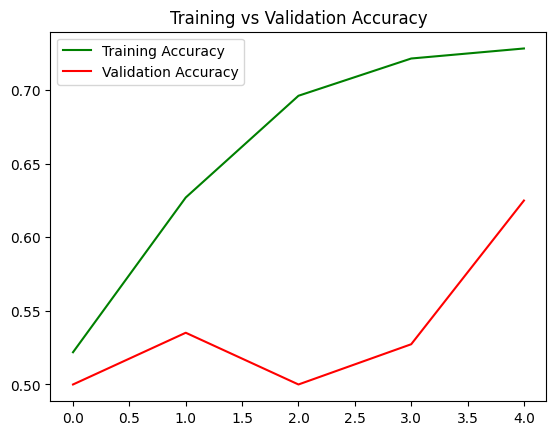

In [18]:
plt.figure()
plt.plot(train_acc , color = 'green', label = 'Training Accuracy')
plt.plot(val_acc , color = 'red', label = 'Validation Accuracy')
plt.title('Training vs Validation Accuracy')
plt.legend() #plt accuracy

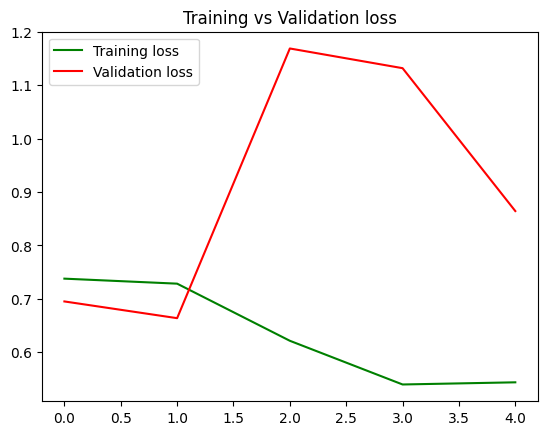

In [20]:
plt.figure()
plt.plot(loss , color = 'green', label = 'Training loss')
plt.plot(val_loss , color = 'red', label = 'Validation loss')
plt.title('Training vs Validation loss')
plt.legend() #plot loss